In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,Number,Category,Action_needed,Question,Subcategory,Action,Time,Sentence
0,1,lights,1,0,kitchen,on,today,Illuminate the kitchen today.
1,2,lights,1,0,kitchen,on,tomorrow,Illuminate the kitchen tomorrow.
2,3,lights,1,0,kitchen,on,hour,Turn on the light in the kitchen in 10 hours.
3,4,lights,1,0,kitchen,on,day,Turn on the light in the kitchen in 1 day.
4,5,lights,1,0,diningroom,on,today,Illuminate the dining room today.


In [4]:
df.columns

Index(['Number', 'Category', 'Action_needed', 'Question', 'Subcategory',
       'Action', 'Time', 'Sentence'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663 entries, 0 to 662
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Number         663 non-null    int64 
 1   Category       663 non-null    object
 2   Action_needed  663 non-null    int64 
 3   Question       663 non-null    int64 
 4   Subcategory    663 non-null    object
 5   Action         663 non-null    object
 6   Time           663 non-null    object
 7   Sentence       663 non-null    object
dtypes: int64(3), object(5)
memory usage: 41.6+ KB


In [6]:
df.dtypes

Number            int64
Category         object
Action_needed     int64
Question          int64
Subcategory      object
Action           object
Time             object
Sentence         object
dtype: object

In [7]:
np.sum(df.isnull().any(axis=1))

0

In [8]:
print('Count of columns in the data is:  ', len(df.columns))

Count of columns in the data is:   8


In [9]:
current=len(df)
print('Rows of data before Delecting ', current)

Rows of data before Delecting  663


In [10]:
df=df.drop_duplicates()

In [11]:
df.isnull().sum()

Number           0
Category         0
Action_needed    0
Question         0
Subcategory      0
Action           0
Time             0
Sentence         0
dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

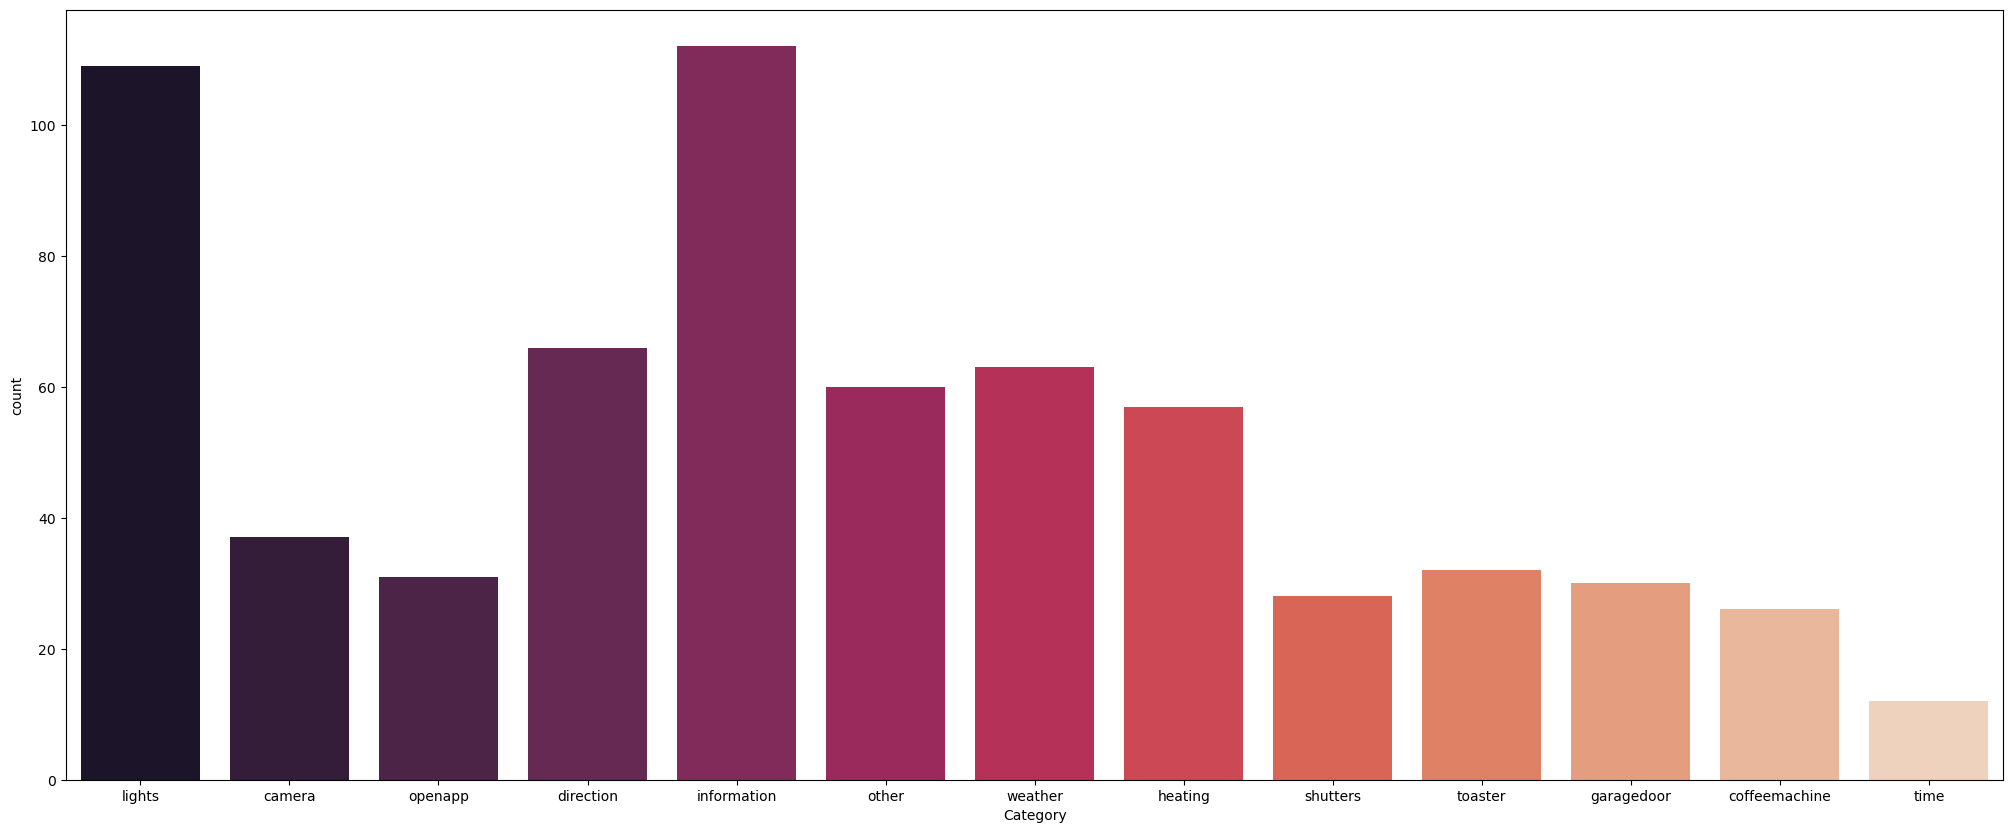

In [12]:
plt.figure(figsize=(25,10))
sns.countplot(x="Category", palette="rocket", data=df)

<AxesSubplot:xlabel='Subcategory', ylabel='count'>

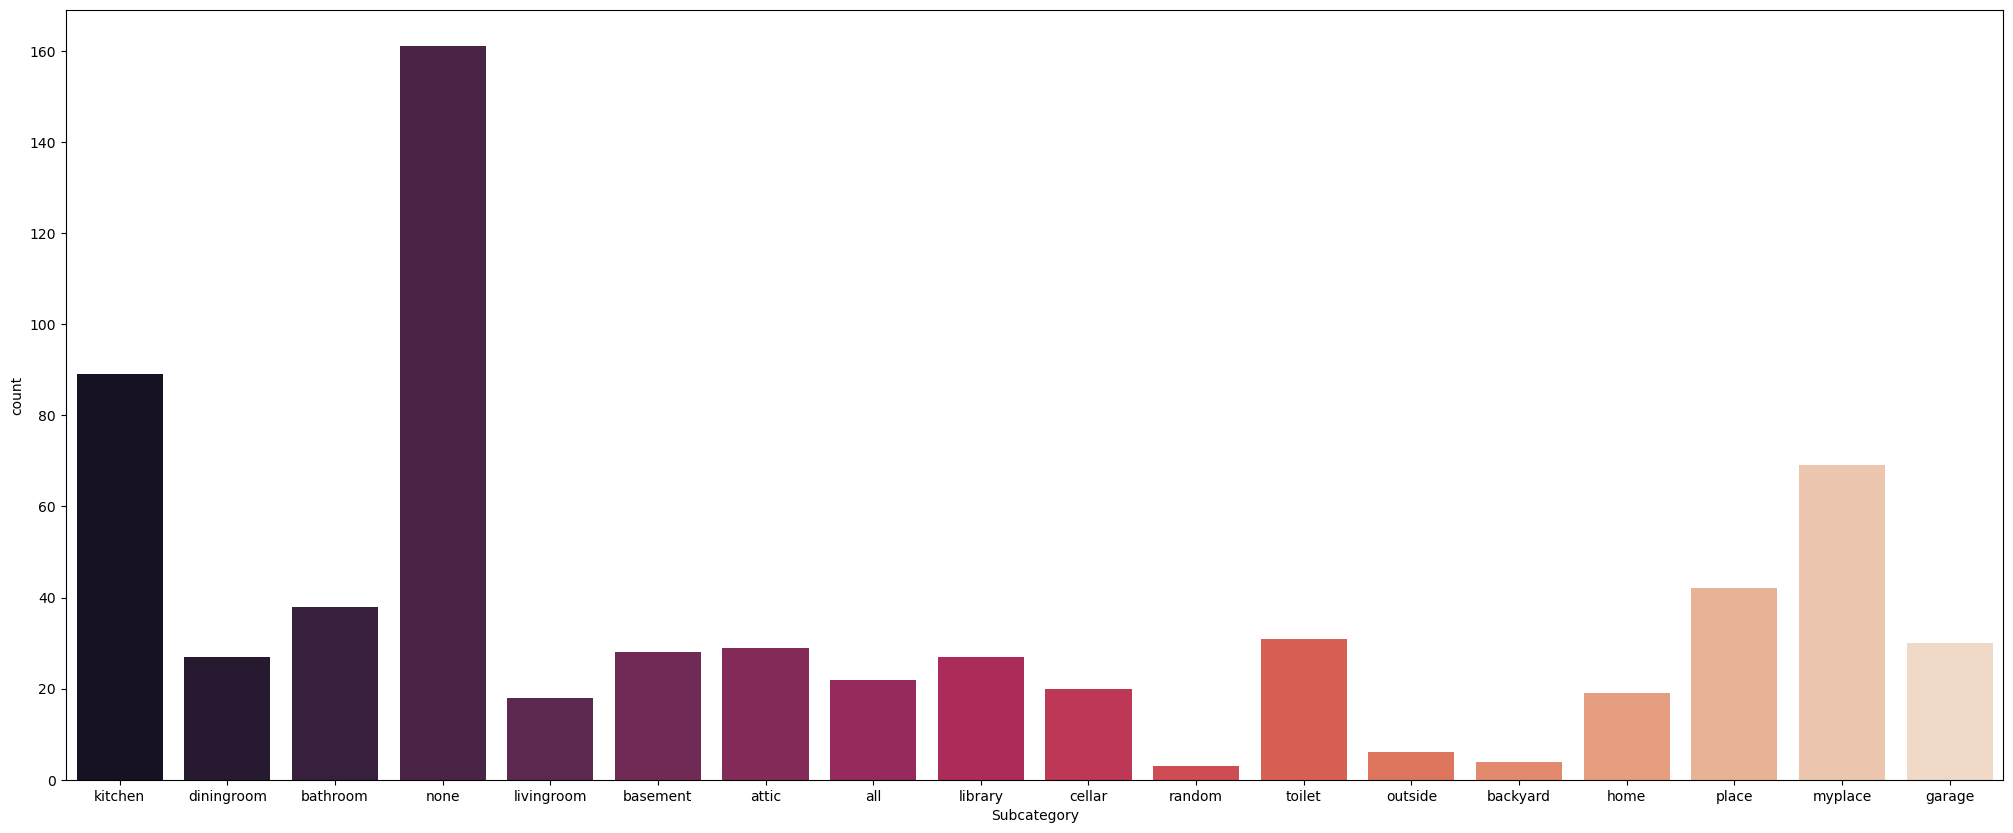

In [13]:
plt.figure(figsize=(25,10))
sns.countplot(x="Subcategory", palette="rocket", data=df)

<AxesSubplot:xlabel='Subcategory', ylabel='count'>

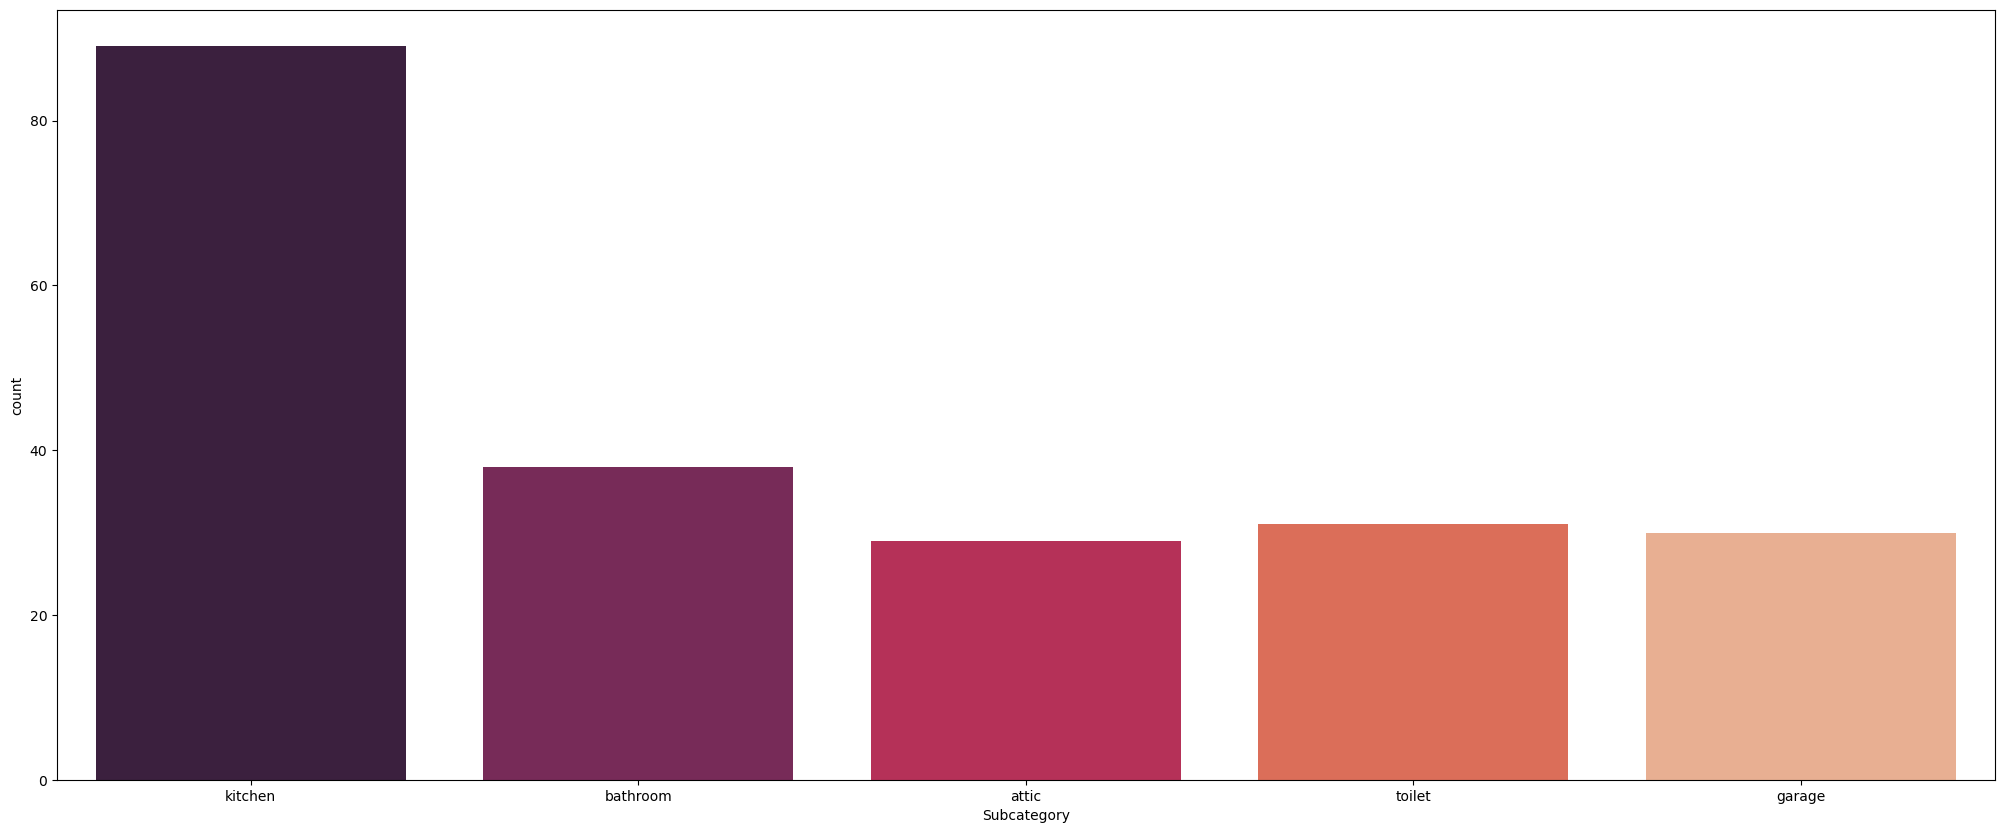

In [14]:
plt.figure(figsize=(25,10))
df2 = df.loc[df['Subcategory'].str.contains('kitchen|bathroom|garage|toilet|attic')]
sns.countplot(x="Subcategory", palette="rocket", data=df2)

<AxesSubplot:xlabel='Action', ylabel='count'>

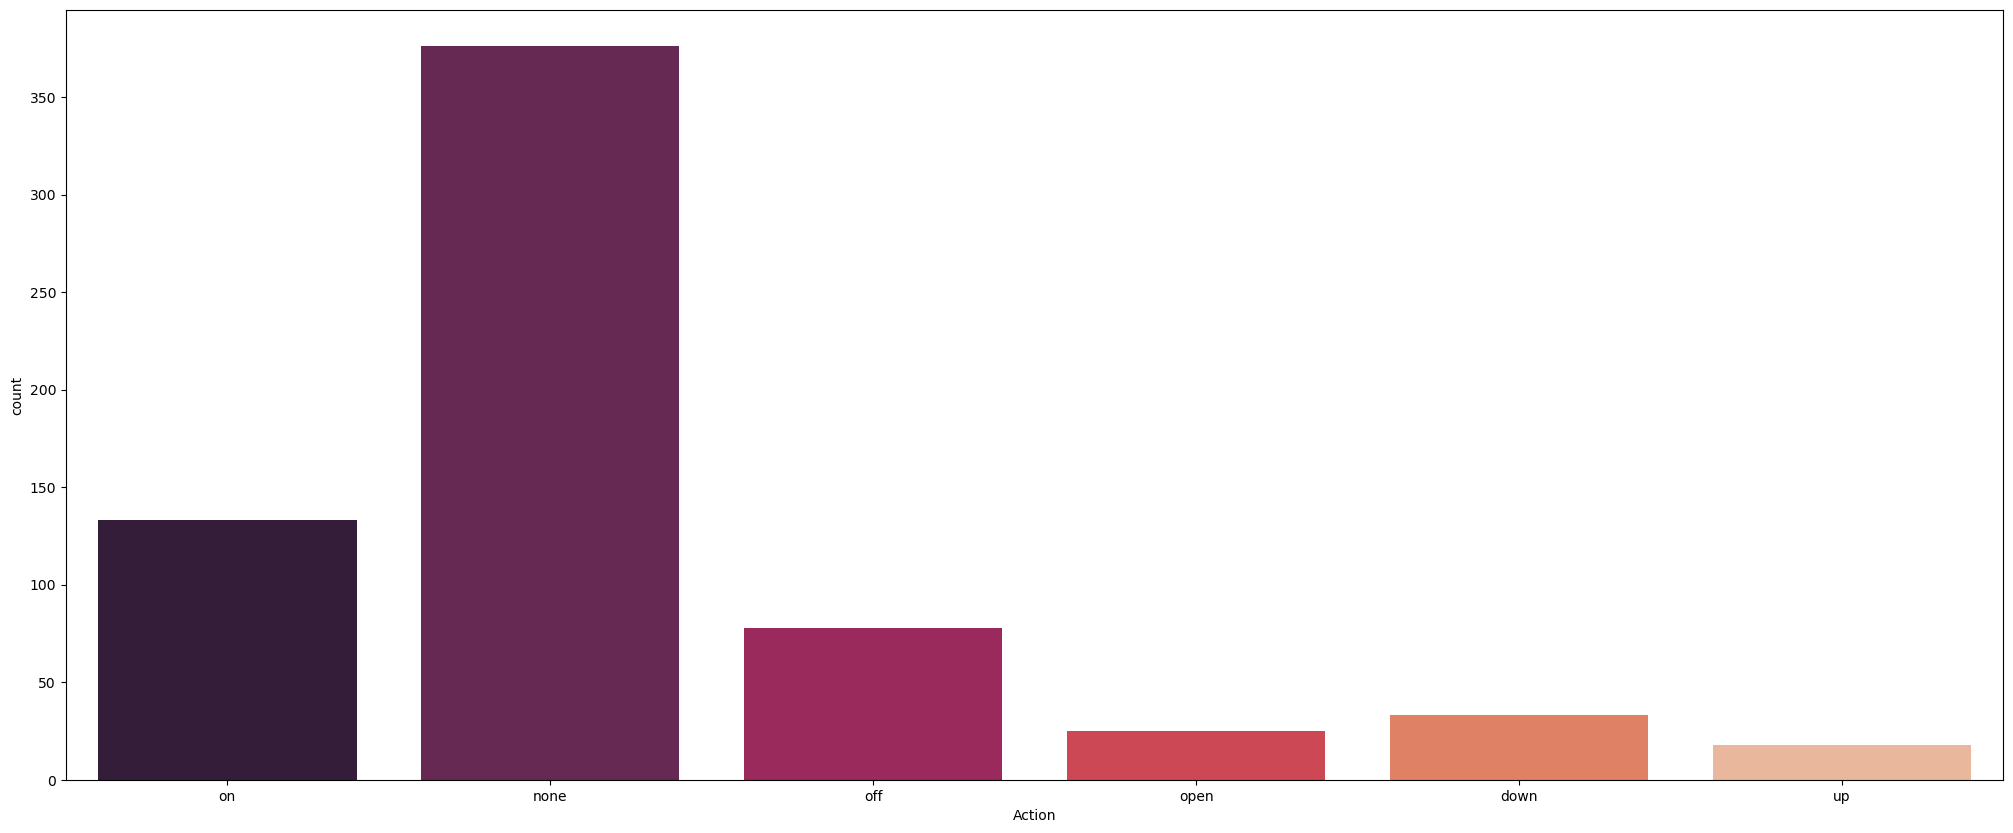

In [15]:
plt.figure(figsize=(25,10))
sns.countplot(x="Action", palette="rocket", data=df)

In [16]:
plt.figure(figsize=(25,10))
df.loc[df['Subcategory'].str.contains('place')].head(5)

,Number,Category,Action_needed,Question,Subcategory,Action,Time,Sentence
180,181,direction,1,1,place,none,now,Can you tell me the way to that place?
184,185,direction,1,1,place,none,hour,Can you tell me the way to that place in an hour?
186,187,direction,1,1,myplace,none,now,Where am I?
188,189,direction,1,1,place,none,now,Show me the bus between leuven and home?
189,190,direction,1,1,place,none,now,Where is the nearest bus stop in Antwerpen?


<Figure size 2500x1000 with 0 Axes>

In [17]:
df['Sentence']=df['Sentence'].str.lower()

In [18]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [19]:
def processPost(text): 

    text = re.sub('@[^\s]+', ' ', text)
    

    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)

    text= remove_punctuations(text)
    
    return text

In [20]:
df["Sentence"] = df["Sentence"].apply(lambda x: processPost(x))

In [21]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df["Sentence"] = df["Sentence"].apply(tokenizer.tokenize)

In [22]:
df["Sentence"].head()

0                    [illuminate, the, kitchen, today]
1                 [illuminate, the, kitchen, tomorrow]
2    [turn, on, the, light, in, the, kitchen, in, 1...
3    [turn, on, the, light, in, the, kitchen, in, 1...
4               [illuminate, the, dining, room, today]
Name: Sentence, dtype: object

In [23]:
all_words = [word for tokens in df["Sentence"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df["Sentence"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

5045 words total, with a vocabulary size of 403
Max sentence length is 17


In [24]:
counter = Counter(all_words)

In [25]:
counter.most_common(25)

[('the', 613),
 ('in', 434),
 ('is', 185),
 ('it', 158),
 ('you', 132),
 ('me', 118),
 ('turn', 108),
 ('on', 97),
 ('can', 85),
 ('what', 78),
 ('i', 73),
 ('minutes', 60),
 ('hour', 55),
 ('room', 54),
 ('an', 54),
 ('a', 49),
 ('do', 49),
 ('when', 47),
 ('light', 45),
 ('dont', 43),
 ('for', 43),
 ('off', 42),
 ('kitchen', 41),
 ('temperature', 41),
 ('bathroom', 37)]

In [26]:
word_vectorizer = TfidfVectorizer()

Get_Vec= word_vectorizer.fit_transform(df['Sentence'].astype('str'))
Get_Vec= Get_Vec.toarray()

vocab1 = word_vectorizer.get_feature_names_out()
Features_vect=pd.DataFrame(np.round(Get_Vec, 1), columns=vocab1)
Features_vect.head()

,10,11,112,15,20,21,43,45,50,85,...,with,without,would,wouldnt,written,yesterday,you,youd,your,youre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
encoding_data1 = preprocessing.LabelEncoder()
encoding1=encoding_data1.fit_transform(df['Category'])
df['Category'] = encoding1

encoding_data2 = preprocessing.LabelEncoder()
encoding2=encoding_data2.fit_transform(df['Subcategory'])
df['Subcategory'] = encoding2

encoding_data3 = preprocessing.LabelEncoder()
encoding3=encoding_data3.fit_transform(df['Action'])
df['Action'] = encoding3

In [28]:
from sklearn.model_selection import train_test_split
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(Features_vect, df['Category'], test_size=0.33, random_state=42)
X_train_subcat, X_test_subcat, y_train_subcat, y_test_subcat = train_test_split(Features_vect, df['Subcategory'] , test_size=0.33, random_state=42)
X_train_action, X_test_action, y_train_action, y_test_action = train_test_split(Features_vect, df['Action'], test_size=0.33, random_state=42)

In [29]:
X_train_cat_tfidf, X_test_cat_tfidf, y_train_cat_tfidf, y_test_cat_tfidf = train_test_split(Features_vect, df['Category'], test_size=0.33, random_state=42)

In [30]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import statistics
import time

DTC = tree.DecisionTreeClassifier(splitter="best") # Decision Tree Classifier
SVC = SVC(kernel='linear', decision_function_shape='ovo') # SVC
RFC = RandomForestClassifier() # Random Forest Classifier
MLP = MLPClassifier() # MLP Classifier

In [31]:
training_num = 1
def get_average_accuracy(model_name, m, X, y, X_test, y_test, test_num=training_num):
    accuracy = []
    time_arr = []
    for i in range(test_num):
        start_time = time.time()
        m.fit(X, y)
        y_preds = m.predict(X_test)
        accur = accuracy_score(y_test, y_preds)
        t = time.time() - start_time
        accuracy.append(accur)
        time_arr.append(t)
    
    accur_val = statistics.mean(accuracy) * 100
    time_output = statistics.mean(time_arr)
    if test_num == 1:
        output = {
        'accuracy' : accur_val, 
        'stdev': 0,
        'time': time_output
        }
        print(f"{model_name} | Accuracy: {accur_val} - Time: {time_output}")
    else:
        st_dev = statistics.stdev(accuracy)
        output = {
        'accuracy' : accur_val, 
        'stdev': st_dev,
        'time': time_output
        }
        print(f"{model_name} | Accuracy: {accur_val} - Time: {time_output} - stdev: {st_dev}")
        
    return output

In [32]:
get_average_accuracy("MLP Classifier", MLP, X_train_cat, y_train_cat, X_test_cat, y_test_cat, 1)

MLP Classifier | Accuracy: 88.12785388127854 - Time: 2.580845594406128


{'accuracy': 88.12785388127854, 'stdev': 0, 'time': 2.580845594406128}

In [33]:
MLP = MLPClassifier(max_iter=500) # MLP Classifier
# get_average_accuracy("MLP Classifier", MLP, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)
get_average_accuracy("MLP Classifier", MLP, X_train_cat, y_train_cat, X_test_cat, y_test_cat, 1)

MLP Classifier | Accuracy: 88.58447488584474 - Time: 4.014962673187256


{'accuracy': 88.58447488584474, 'stdev': 0, 'time': 4.014962673187256}

In [34]:
print(f"Models Trained {training_num} times.")
get_average_accuracy("Decision Tree Classifier", DTC, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)
get_average_accuracy("SVC Linear", SVC, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)
get_average_accuracy("Random Forest Classifier", RFC, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)
get_average_accuracy("MLP Classifier", MLP, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)

Models Trained 1 times.
Decision Tree Classifier | Accuracy: 78.53881278538812 - Time: 0.04309201240539551
SVC Linear | Accuracy: 86.7579908675799 - Time: 0.1096341609954834
Random Forest Classifier | Accuracy: 83.10502283105022 - Time: 0.3953061103820801
MLP Classifier | Accuracy: 88.58447488584474 - Time: 3.5896213054656982


{'accuracy': 88.58447488584474, 'stdev': 0, 'time': 3.5896213054656982}

In [35]:
# n_estimators = 100
RFC_a = RandomForestClassifier(n_estimators=100)
RFC_a = get_average_accuracy("Random Forest Classifier A", RFC_a, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)

# n_estimators = 200
RFC_b = RandomForestClassifier(n_estimators=200)
RFC_b = get_average_accuracy("Random Forest Classifier B", RFC_b, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)

# n_estimators = 300
RFC_c = RandomForestClassifier(n_estimators=300)
RFC_c = get_average_accuracy("Random Forest Classifier C", RFC_c, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)

# n_estimators = 400
RFC_d = RandomForestClassifier(n_estimators=400)
RFC_d = get_average_accuracy("Random Forest Classifier D", RFC_d, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)

# n_estimators = 500
RFC_e = RandomForestClassifier(n_estimators=500)
RFC_e = get_average_accuracy("Random Forest Classifier E", RFC_e, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)

# n_estimators = 750
RFC_f = RandomForestClassifier(n_estimators=750)
RFC_f = get_average_accuracy("Random Forest Classifier F", RFC_f, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)

Random Forest Classifier A | Accuracy: 81.7351598173516 - Time: 0.42958736419677734
Random Forest Classifier B | Accuracy: 84.01826484018264 - Time: 0.7485744953155518
Random Forest Classifier C | Accuracy: 83.10502283105022 - Time: 1.0300638675689697
Random Forest Classifier D | Accuracy: 83.10502283105022 - Time: 1.3751840591430664
Random Forest Classifier E | Accuracy: 84.01826484018264 - Time: 1.7033042907714844
Random Forest Classifier F | Accuracy: 83.56164383561644 - Time: 2.725048065185547


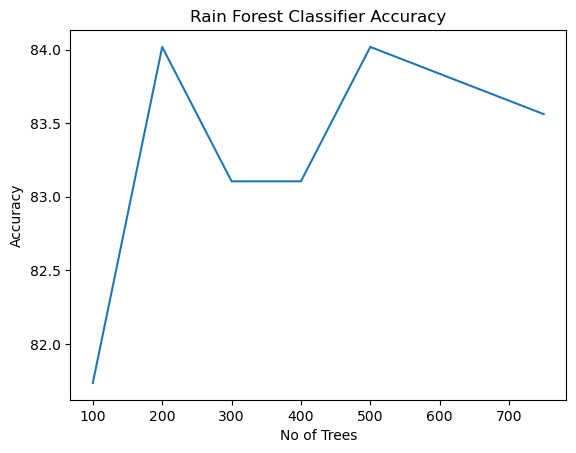

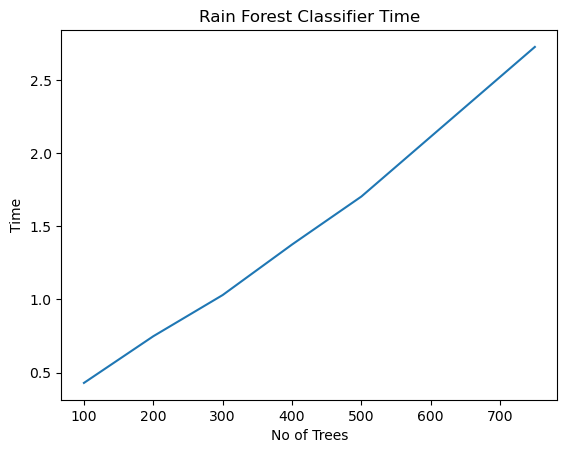

In [36]:
plt.title('Rain Forest Classifier Accuracy')
plt.xlabel('No of Trees')
plt.ylabel('Accuracy') 
x_axis = [100,200,300,400,500,750]
y_axis = [RFC_a["accuracy"],RFC_b["accuracy"],RFC_c["accuracy"],RFC_d["accuracy"],RFC_e["accuracy"],RFC_f["accuracy"]]
plt.plot(x_axis, y_axis)
plt.show()

plt.title('Rain Forest Classifier Time')
plt.ylabel('Time') 
plt.xlabel('No of Trees')
x_axis = [100,200,300,400,500,750]
y_axis = [RFC_a["time"],RFC_b["time"],RFC_c["time"],RFC_d["time"],RFC_e["time"],RFC_f["time"]]
plt.plot(x_axis, y_axis)
plt.show()

In [37]:
# Random State = 1
RFC_e_1 = RandomForestClassifier(n_estimators=750, random_state=1)
RFC_e_1 = get_average_accuracy("Random Forest Classifier 1", RFC_e_1, X_train_cat, y_train_cat, X_test_cat, y_test_cat, 1)

# Random State = 5
RFC_e_2 = RandomForestClassifier(n_estimators=750, random_state=5)
RFC_e_2 = get_average_accuracy("Random Forest Classifier 2", RFC_e_2, X_train_cat, y_train_cat, X_test_cat, y_test_cat, 1)

# Random State = 25
RFC_e_3 = RandomForestClassifier(n_estimators=750, random_state=25)
RFC_e_3 = get_average_accuracy("Random Forest Classifier 3", RFC_e_3, X_train_cat, y_train_cat, X_test_cat, y_test_cat, 1)

# Random State = 50
RFC_e_4 = RandomForestClassifier(n_estimators=750, random_state=50)
RFC_e_4 = get_average_accuracy("Random Forest Classifier 4", RFC_e_4, X_train_cat, y_train_cat, X_test_cat, y_test_cat, 1)

RFC_e_5 = RandomForestClassifier(n_estimators=750, random_state=100)
RFC_e_5 = get_average_accuracy("Random Forest Classifier 5", RFC_e_5, X_train_cat, y_train_cat, X_test_cat, y_test_cat, 1)

RFC_e_6 = RandomForestClassifier(n_estimators=750, random_state=500)
RFC_e_6 = get_average_accuracy("Random Forest Classifier 6", RFC_e_6, X_train_cat, y_train_cat, X_test_cat, y_test_cat, 1)

Random Forest Classifier 1 | Accuracy: 81.7351598173516 - Time: 3.1083598136901855
Random Forest Classifier 2 | Accuracy: 83.10502283105022 - Time: 3.172642469406128
Random Forest Classifier 3 | Accuracy: 83.56164383561644 - Time: 2.699681282043457
Random Forest Classifier 4 | Accuracy: 83.56164383561644 - Time: 2.8152801990509033
Random Forest Classifier 5 | Accuracy: 83.56164383561644 - Time: 2.749926805496216
Random Forest Classifier 6 | Accuracy: 84.47488584474885 - Time: 2.724975824356079


In [38]:
MLP_a = MLPClassifier(max_iter=2000)
MLP_a = get_average_accuracy("MLP Classifier A", MLP_a, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)

MLP_b = MLPClassifier(max_iter=5000)
MLP_b = get_average_accuracy("MLP Classifier B", MLP_b, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)

MLP_c = MLPClassifier(max_iter=10000)
MLP_c = get_average_accuracy("MLP Classifier C", MLP_c, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)

MLP_d = MLPClassifier(max_iter=15000)
MLP_d = get_average_accuracy("MLP Classifier D", MLP_d, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)

MLP_e = MLPClassifier(max_iter=20000)
MLP_e = get_average_accuracy("MLP Classifier E", MLP_e, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)

MLP_f = MLPClassifier(max_iter=30000)
MLP_f = get_average_accuracy("MLP Classifier F", MLP_f, X_train_cat, y_train_cat, X_test_cat, y_test_cat, training_num)

MLP Classifier A | Accuracy: 88.12785388127854 - Time: 3.777120351791382
MLP Classifier B | Accuracy: 87.21461187214612 - Time: 4.029991388320923
MLP Classifier C | Accuracy: 88.12785388127854 - Time: 4.334980726242065
MLP Classifier D | Accuracy: 89.49771689497716 - Time: 3.4797158241271973
MLP Classifier E | Accuracy: 89.04109589041096 - Time: 3.289926290512085
MLP Classifier F | Accuracy: 88.58447488584474 - Time: 4.355237722396851


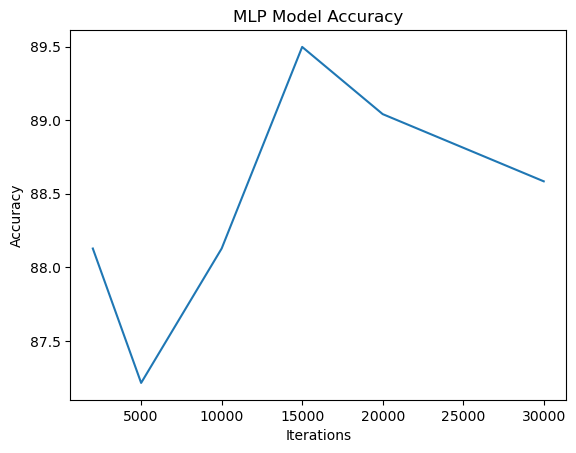

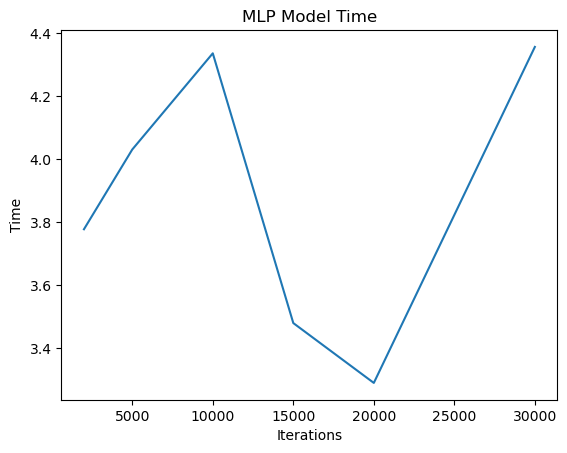

In [39]:
plt.title('MLP Model Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy') 
x_axis = [2000,5000,10000,15000,20000,30000]
y_axis = [MLP_a["accuracy"],MLP_b["accuracy"],MLP_c["accuracy"],MLP_d["accuracy"],MLP_e["accuracy"],MLP_f["accuracy"]]
plt.plot(x_axis, y_axis)
plt.show()

plt.title('MLP Model Time')
plt.ylabel('Time') 
plt.xlabel('Iterations')
x_axis = [2000,5000,10000,15000,20000,30000]
y_axis = [MLP_a["time"],MLP_b["time"],MLP_c["time"],MLP_d["time"],MLP_e["time"],MLP_f["time"]]
plt.plot(x_axis, y_axis)
plt.show()


In [40]:
MLP_c_1 = MLPClassifier(max_iter=10000, random_state=1)
MLP_c_1 = get_average_accuracy("MLP Classifier 1", MLP_c_1, X_train_cat, y_train_cat, X_test_cat, y_test_cat, 1)

MLP_c_2 = MLPClassifier(max_iter=10000, random_state=5)
MLP_c_2 = get_average_accuracy("MLP Classifier 2", MLP_c_2, X_train_cat, y_train_cat, X_test_cat, y_test_cat, 1)

MLP_c_3 = MLPClassifier(max_iter=10000, random_state=100)
MLP_c_3 = get_average_accuracy("MLP Classifier 3", MLP_c_3, X_train_cat, y_train_cat, X_test_cat, y_test_cat, 1)

MLP_c_4 = MLPClassifier(max_iter=10000, random_state=500)
MLP_c_4 = get_average_accuracy("MLP Classifier 4", MLP_c_4, X_train_cat, y_train_cat, X_test_cat, y_test_cat, 1)

MLP Classifier 1 | Accuracy: 88.12785388127854 - Time: 3.2923524379730225
MLP Classifier 2 | Accuracy: 88.12785388127854 - Time: 3.864830255508423
MLP Classifier 3 | Accuracy: 89.04109589041096 - Time: 3.676442861557007
MLP Classifier 4 | Accuracy: 89.04109589041096 - Time: 4.210674285888672


The total standard deviation of the MLP model is also rather low, indicating that the MLP model did not exhibit a large number of discrepancies when each iteration was evaluated.

In [41]:
pip install scikit-plot


Note: you may need to restart the kernel to use updated packages.


In [42]:
import scikitplot as skplt
def train_fit(model_name, m, X, y, X_test, y_test):
    m.fit(X, y)
    y_preds = m.predict(X_test)
    accuracy = accuracy_score(y_test, y_preds)
    print(f"{model_name}: {accuracy * 100}")
    return m

MLP Classifier: 87.67123287671232
Random Forest Classifier: 83.10502283105022


<AxesSubplot:title={'center':'RFC TFIDF ROC Curve'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

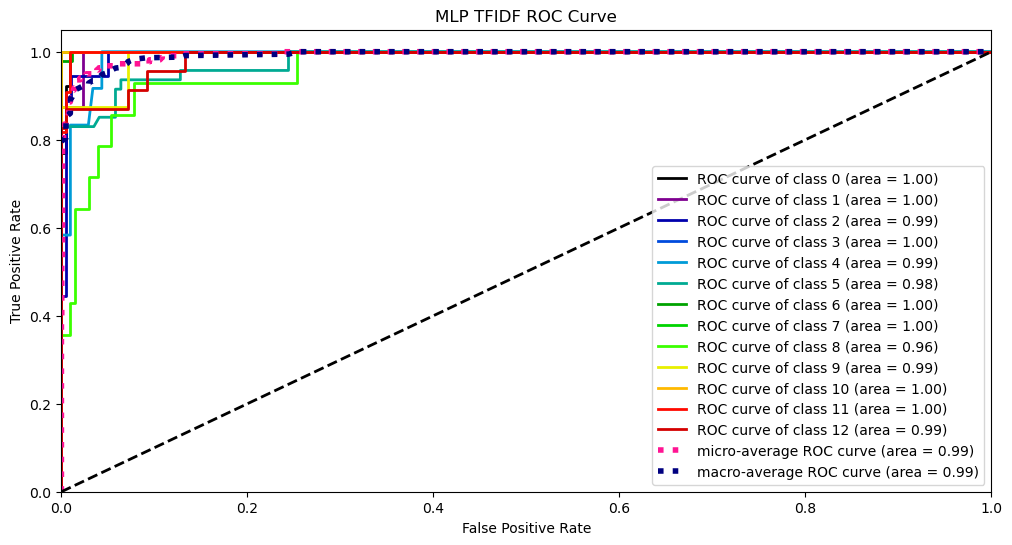

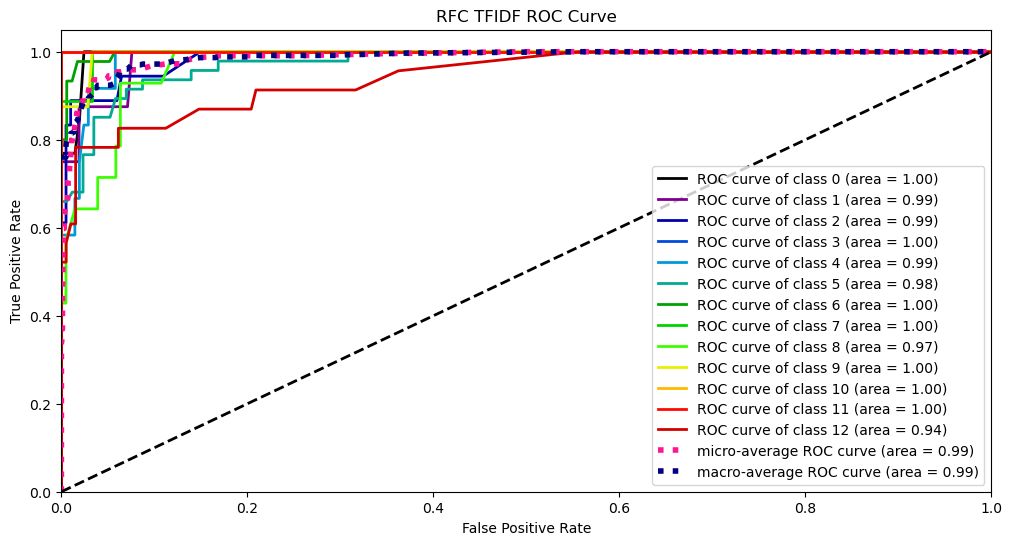

In [43]:
# MLP
MLP_tfidf = MLPClassifier(max_iter=10000, random_state=500)
MLP_tfidf = train_fit("MLP Classifier", MLP, X_train_cat_tfidf, y_train_cat_tfidf, X_test_cat_tfidf, y_test_cat_tfidf)
Y_test_probs = MLP_tfidf.predict_proba(X_test_cat_tfidf)
skplt.metrics.plot_roc(y_test_cat_tfidf, Y_test_probs, title="MLP TFIDF ROC Curve", figsize=(12,6))

# Random Forest Classifier
RFC_tfidf = RandomForestClassifier(n_estimators=750, random_state=5)
RFC_tfidf = train_fit("Random Forest Classifier", RFC, X_train_cat_tfidf, y_train_cat_tfidf, X_test_cat_tfidf, y_test_cat_tfidf)
Y_test_probs = RFC_tfidf.predict_proba(X_test_cat_tfidf)
skplt.metrics.plot_roc(y_test_cat_tfidf, Y_test_probs, title="RFC TFIDF ROC Curve", figsize=(12,6))

Based of this findings the MLP model looking like the best option for use in the chatbot.
training the models on all data now and then we will predict the new data.

In [44]:
MLP = MLPClassifier(max_iter=10000, random_state=1)
Cat_model=MLP.fit(Features_vect, df['Category'])

MLP = MLPClassifier(max_iter=10000, random_state=1)
Sub_cat_model=MLP.fit(Features_vect, df['Subcategory'])

MLP = MLPClassifier(max_iter=10000, random_state=1)
Action_model=MLP.fit(Features_vect, df['Action'])

In [72]:
user_data=input('Please enter sentence:')

Please enter sentence:Turn shutters off in kitchen


In [73]:
user_data=pd.DataFrame([user_data])
user_data.columns=['Sentence']
user_data

,Sentence
0,Turn shutters off in kitchen


In [74]:
def preprocesing_data(user_data):
    user_data['Sentence']=user_data['Sentence'].str.lower()
    english_punctuations = string.punctuation
    punctuations_list = english_punctuations + english_punctuations
    def remove_punctuations(text):
        translator = str.maketrans('', '', punctuations_list)
        return text.translate(translator)
    def processPost(text): 
        text = re.sub('@[^\s]+', ' ', text)
        text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
        text= remove_punctuations(text)
        return text
    user_data["Sentence"] = user_data["Sentence"].apply(lambda x: processPost(x))
    return user_data["Sentence"]
user_data["Sentence"]=preprocesing_data(user_data)
Get_Vec= word_vectorizer.transform(user_data['Sentence'].astype('str'))

In [75]:
pred1=Cat_model.predict(Get_Vec)
pred1=encoding_data1.inverse_transform(pred1)
pred1=str(pred1)
pred1

"['shutters']"

In [76]:
pred2=Sub_cat_model.predict(Get_Vec)
pred2=encoding_data2.inverse_transform(pred2)
pred2=str(pred2)
pred2

"['kitchen']"

In [77]:
pred3=Action_model.predict(Get_Vec)
pred3=encoding_data3.inverse_transform(pred3)
pred3=str(pred3)
pred3

"['off']"

In [78]:
#Find the furthest bus stop
#Random sentence
#Hi Google, please turn off the lights.
#Turn shutters off in kitchen